# RNN in Tensorflow

1. Create cell(s) with output size(=`num_unit`=`hidden_size`)
2. Activate driver: `output, _ = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)`

`shape = (batch_size, sequence_length, hidden_size)`

## Feed to RNN
```python
X = tf.placeholder(tf.float32, [None, sequence_length, input_dim])
Y = tf.placeholder(tf.int32, [None, sequence_length])

cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(cell, X, initial_state=initial_state, dtype=tf.float32)
```

### Cells
 - `.BasicRNNCell(rnn_size)`
 - `.BasicLSTMCell(rnn_size)`
 - `.GRUCell(rnn_size)`

### Cost: `sequence_loss`
```python
# [batch_size, sequence_length]
y_data = tf.constant([[1, 1, 1]])
# [batch_size, sequence_length, emb_dim]
prediction = tf.constant([[[.2, .7], [.6, .2], [.2, .9]]], dtype=tf.float32)
# [batch_size, sequence_length]
weights = tf.constant([[1, 1, 1]], dtype=tf.float32)   # Normal all 1s

sequence_loss = tf.constrib.seq2seq.sequence_loss(logits=prediction, targets=y_data, weights=weights)
```

### Train with `sequence_loss`
```python
outputs, _states = tf.nn.dynamic_rnn(cell, X, initial_state=initial_state, dtype=tf.float32)
weights = tf.ones([batch_size, sequence_length])

sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        l, _ = sess.run([loss, train], feed_dict={X: x_one_hot, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_one_hot})
        print(i, "loss:", l, "Prediction: ", result, "true Y: ", y_data)
        
        result_str = "".join([idx2char[c] for c in np.squeeze(result)])
        print("Prediction str: ", result_str)
```

In [4]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph()

batch_size = 1
sequence_length = 6
input_dim = 5
learning_rate = .1

idx2char = ['h', 'i', 'e', 'l', 'o']
x_data = [[0, 1, 0, 2, 3, 3]]
x_one_hot = [[[1, 0, 0, 0, 0],
              [0, 1, 0, 0, 0],
              [1, 0, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 0, 1, 0],
              [0, 0, 0, 1, 0]]]
y_data = [[1, 0, 2, 3, 3, 4]]
X = tf.placeholder(tf.float32, [None, sequence_length, input_dim])
Y = tf.placeholder(tf.int32, [None, sequence_length])

cell = tf.contrib.rnn.BasicLSTMCell(num_units=input_dim, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(cell, X, initial_state=initial_state, dtype=tf.float32)

weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        l, _ = sess.run([loss, train], feed_dict={X: x_one_hot, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_one_hot})
        print(i, "loss:", l, "Prediction: ", result, "true Y: ", y_data)

        result_str = "".join([idx2char[c] for c in np.squeeze(result)])
        print("Prediction str: ", result_str)

0 loss: 1.59323 Prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  llllll
1 loss: 1.49657 Prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  llllll
2 loss: 1.42371 Prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  llllll
3 loss: 1.3641 Prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  llllll
4 loss: 1.29841 Prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  llllll
5 loss: 1.23455 Prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  llllll
6 loss: 1.17869 Prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  llllll
7 loss: 1.12535 Prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  llllll
8 loss: 1.08707 Prediction:  [[3 0 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  lhllll
9 loss: 1.05562 Prediction:  [[3 0 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  lhllll
10 loss: 1.

88 loss: 0.640617 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
89 loss: 0.640158 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
90 loss: 0.639658 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
91 loss: 0.639112 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
92 loss: 0.638517 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
93 loss: 0.637866 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
94 loss: 0.637159 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
95 loss: 0.636394 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
96 loss: 0.635577 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
97 loss: 0.634717 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str

178 loss: 0.617855 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
179 loss: 0.617821 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
180 loss: 0.617795 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
181 loss: 0.617741 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
182 loss: 0.617681 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
183 loss: 0.617637 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
184 loss: 0.617605 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
185 loss: 0.617567 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
186 loss: 0.617514 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
187 loss: 0.617466 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Pred

268 loss: 0.615018 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
269 loss: 0.614996 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
270 loss: 0.614973 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
271 loss: 0.614951 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
272 loss: 0.614929 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
273 loss: 0.614907 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
274 loss: 0.614885 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
275 loss: 0.614863 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
276 loss: 0.614842 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
277 loss: 0.61482 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Predi

360 loss: 0.61337 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
361 loss: 0.613356 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
362 loss: 0.613341 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
363 loss: 0.613327 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
364 loss: 0.613313 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
365 loss: 0.613299 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
366 loss: 0.613285 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
367 loss: 0.613271 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
368 loss: 0.613257 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
369 loss: 0.613243 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Predi

453 loss: 0.61225 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
454 loss: 0.61224 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
455 loss: 0.61223 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
456 loss: 0.61222 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
457 loss: 0.612209 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
458 loss: 0.612199 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
459 loss: 0.612189 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
460 loss: 0.612179 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
461 loss: 0.61217 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
462 loss: 0.61216 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction

Prediction str:  ihello
546 loss: 0.611424 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
547 loss: 0.611417 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
548 loss: 0.611409 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
549 loss: 0.611401 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
550 loss: 0.611394 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
551 loss: 0.611386 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
552 loss: 0.611378 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
553 loss: 0.611371 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
554 loss: 0.611363 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
555 loss: 0.611355 Prediction:  [[1 0 2 3 3 4]] true Y:  [

636 loss: 0.610797 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
637 loss: 0.610791 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
638 loss: 0.610785 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
639 loss: 0.610778 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
640 loss: 0.610772 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
641 loss: 0.610766 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
642 loss: 0.61076 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
643 loss: 0.610754 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
644 loss: 0.610747 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
645 loss: 0.610741 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Predi

732 loss: 0.610252 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
733 loss: 0.610246 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
734 loss: 0.610241 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
735 loss: 0.610236 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
736 loss: 0.610231 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
737 loss: 0.610226 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
738 loss: 0.610221 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
739 loss: 0.610216 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
740 loss: 0.610211 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
741 loss: 0.610206 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Pred

823 loss: 0.609818 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
824 loss: 0.609813 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
825 loss: 0.609809 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
826 loss: 0.609805 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
827 loss: 0.6098 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
828 loss: 0.609796 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
829 loss: 0.609792 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
830 loss: 0.609787 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
831 loss: 0.609783 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
832 loss: 0.609778 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Predic

912 loss: 0.609452 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
913 loss: 0.609448 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
914 loss: 0.609444 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
915 loss: 0.60944 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
916 loss: 0.609436 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
917 loss: 0.609432 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
918 loss: 0.609429 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
919 loss: 0.609425 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
920 loss: 0.609421 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
921 loss: 0.609417 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Predi

995 loss: 0.60915 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
996 loss: 0.609147 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
997 loss: 0.609143 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
998 loss: 0.60914 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
999 loss: 0.609137 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1000 loss: 0.609133 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1001 loss: 0.60913 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1002 loss: 0.609126 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1003 loss: 0.609123 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1004 loss: 0.60912 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Pre

1085 loss: 0.608859 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1086 loss: 0.608855 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1087 loss: 0.608852 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1088 loss: 0.608849 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1089 loss: 0.608846 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1090 loss: 0.608843 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1091 loss: 0.60884 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1092 loss: 0.608837 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1093 loss: 0.608834 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1094 loss: 0.608831 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3,

1167 loss: 0.608619 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1168 loss: 0.608616 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1169 loss: 0.608613 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1170 loss: 0.608611 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1171 loss: 0.608608 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1172 loss: 0.608605 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1173 loss: 0.608602 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1174 loss: 0.6086 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1175 loss: 0.608597 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1176 loss: 0.608594 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 

1251 loss: 0.608395 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1252 loss: 0.608393 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1253 loss: 0.60839 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1254 loss: 0.608388 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1255 loss: 0.608385 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1256 loss: 0.608383 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1257 loss: 0.60838 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1258 loss: 0.608378 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1259 loss: 0.608375 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1260 loss: 0.608373 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 

1342 loss: 0.608174 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1343 loss: 0.608172 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1344 loss: 0.60817 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1345 loss: 0.608167 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1346 loss: 0.608165 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1347 loss: 0.608163 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1348 loss: 0.60816 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1349 loss: 0.608158 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1350 loss: 0.608156 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1351 loss: 0.608154 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 

1433 loss: 0.607972 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1434 loss: 0.60797 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1435 loss: 0.607968 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1436 loss: 0.607966 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1437 loss: 0.607964 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1438 loss: 0.607962 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1439 loss: 0.60796 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1440 loss: 0.607958 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1441 loss: 0.607956 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1442 loss: 0.607953 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 

1524 loss: 0.607788 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1525 loss: 0.607786 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1526 loss: 0.607784 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1527 loss: 0.607782 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1528 loss: 0.60778 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1529 loss: 0.607778 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1530 loss: 0.607776 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1531 loss: 0.607774 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1532 loss: 0.607772 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1533 loss: 0.60777 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 

1612 loss: 0.607624 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1613 loss: 0.607622 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1614 loss: 0.60762 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1615 loss: 0.607618 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1616 loss: 0.607617 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1617 loss: 0.607615 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1618 loss: 0.607613 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1619 loss: 0.607611 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1620 loss: 0.607609 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1621 loss: 0.607608 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3,

1700 loss: 0.607473 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1701 loss: 0.607471 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1702 loss: 0.60747 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1703 loss: 0.607468 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1704 loss: 0.607466 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1705 loss: 0.607465 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1706 loss: 0.607463 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1707 loss: 0.607462 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1708 loss: 0.60746 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1709 loss: 0.607458 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 

1789 loss: 0.607333 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1790 loss: 0.607332 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1791 loss: 0.60733 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1792 loss: 0.607329 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1793 loss: 0.607327 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1794 loss: 0.607326 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1795 loss: 0.607324 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1796 loss: 0.607323 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1797 loss: 0.607321 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1798 loss: 0.60732 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 

1876 loss: 0.607208 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1877 loss: 0.607207 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1878 loss: 0.607206 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1879 loss: 0.607204 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1880 loss: 0.607203 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1881 loss: 0.607202 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1882 loss: 0.6072 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1883 loss: 0.607199 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1884 loss: 0.607197 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1885 loss: 0.607196 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 

1963 loss: 0.607094 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1964 loss: 0.607093 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1965 loss: 0.607092 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1966 loss: 0.607091 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1967 loss: 0.607089 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1968 loss: 0.607088 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1969 loss: 0.607087 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1970 loss: 0.607086 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1971 loss: 0.607085 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
Prediction str:  ihello
1972 loss: 0.607083 Prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3

## Programmatic hyper parameters with long sequence

In [7]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph()

learning_rate = .1


sample = ' if you want you'
idx2char = list(set(sample))
char2idx = {c: i for i, c in enumerate(idx2char)}

# hyper parameters
dic_size = len(char2idx)        # RNN input size
rnn_hidden_size = len(char2idx) # RNN output size
num_classes = len(idx2char)     # final output size (RNN or softmax, etc.)
batch_size = 1
sequence_length = len(sample) - 1 # number of lstm unfolding (unit #)

sample_idx = [char2idx[c] for c in sample]
x_data = [sample_idx[:-1]]
y_data = [sample_idx[1:]]
X = tf.placeholder(tf.int32, [None, sequence_length])
Y = tf.placeholder(tf.int32, [None, sequence_length])
X_one_hot = tf.one_hot(X, num_classes)

cell = tf.contrib.rnn.BasicLSTMCell(num_units=rnn_hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(cell, X_one_hot, initial_state=initial_state, dtype=tf.float32)

weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(3000):
        l, _ = sess.run([loss, train], feed_dict={X: x_data, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_data})
        print(i, "loss:", l, "Prediction: ", result, "true Y: ", y_data)

        result_str = "".join([idx2char[c] for c in np.squeeze(result)])
        print("Prediction str: ", result_str)

0 loss: 2.29955 Prediction:  [[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:                 
1 loss: 2.18454 Prediction:  [[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:                 
2 loss: 2.07857 Prediction:  [[7 7 7 7 7 7 7 7 7 7 7 7 7 1 7]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:               u 
3 loss: 1.99666 Prediction:  [[7 7 7 7 7 7 7 7 4 4 7 7 7 7 7]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:          nn     
4 loss: 1.91342 Prediction:  [[7 7 7 7 7 1 7 8 7 4 7 7 7 1 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:       u w n   uu
5 loss: 1.78995 Prediction:  [[6 7 7 6 1 1 7 1 0 7 7 7 6 1 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  y  yuu ua   yuu
6 loss: 1.74877 Prediction:  [[6 7 7 6 1 1 7 8 0 4 5 7 6 1 1]] true Y:  [[9, 3, 7,

56 loss: 1.0709 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
57 loss: 1.07014 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
58 loss: 1.06932 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
59 loss: 1.06851 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
60 loss: 1.06767 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
61 loss: 1.06697 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
62 loss: 1.06626 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9,

114 loss: 1.05455 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
115 loss: 1.05441 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
116 loss: 1.05426 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
117 loss: 1.0541 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
118 loss: 1.05395 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
119 loss: 1.0538 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
120 loss: 1.05366 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:

173 loss: 1.051 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
174 loss: 1.05097 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
175 loss: 1.05095 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
176 loss: 1.05093 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
177 loss: 1.05091 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
178 loss: 1.05088 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
179 loss: 1.05086 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:

232 loss: 1.05003 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
233 loss: 1.05002 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
234 loss: 1.05001 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
235 loss: 1.05 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
236 loss: 1.04999 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
237 loss: 1.04998 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
238 loss: 1.04997 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y: 

287 loss: 1.04954 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
288 loss: 1.04954 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
289 loss: 1.04953 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
290 loss: 1.04952 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
291 loss: 1.04951 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
292 loss: 1.04951 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
293 loss: 1.0495 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y

345 loss: 1.04921 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
346 loss: 1.04921 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
347 loss: 1.04921 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
348 loss: 1.0492 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
349 loss: 1.0492 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
350 loss: 1.04919 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
351 loss: 1.04919 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:

404 loss: 1.04899 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
405 loss: 1.04899 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
406 loss: 1.04898 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
407 loss: 1.04898 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
408 loss: 1.04898 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
409 loss: 1.04897 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
410 loss: 1.04897 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true 

463 loss: 1.04884 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
464 loss: 1.04883 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
465 loss: 1.04883 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
466 loss: 1.04883 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
467 loss: 1.04882 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
468 loss: 1.04882 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
469 loss: 1.04882 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true 

516 loss: 1.04872 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
517 loss: 1.04872 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
518 loss: 1.04872 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
519 loss: 1.04872 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
520 loss: 1.04872 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
521 loss: 1.04871 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
522 loss: 1.04871 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true 

571 loss: 1.04864 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
572 loss: 1.04864 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
573 loss: 1.04863 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
574 loss: 1.04863 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
575 loss: 1.04863 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
576 loss: 1.04863 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
577 loss: 1.04863 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true 

628 loss: 1.04863 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
629 loss: 1.0487 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
630 loss: 1.0487 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
631 loss: 1.04874 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
632 loss: 1.04863 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
633 loss: 1.04857 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
634 loss: 1.04857 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:

684 loss: 1.05955 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
685 loss: 1.05986 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
686 loss: 1.05976 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
687 loss: 1.05928 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
688 loss: 1.05866 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
689 loss: 1.05874 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
690 loss: 1.0584 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y

738 loss: 1.05689 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
739 loss: 1.05688 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
740 loss: 1.05688 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
741 loss: 1.05687 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
742 loss: 1.05686 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
743 loss: 1.05686 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
744 loss: 1.05685 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true 

796 loss: 1.05666 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
797 loss: 1.05666 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
798 loss: 1.05666 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
799 loss: 1.05666 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
800 loss: 1.05665 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
801 loss: 1.05665 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
802 loss: 1.05665 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true 

850 loss: 1.05371 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
851 loss: 1.05381 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
852 loss: 1.05379 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
853 loss: 1.05371 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
854 loss: 1.05381 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
855 loss: 1.05371 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
856 loss: 1.05378 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true 

903 loss: 1.05364 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
904 loss: 1.05364 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
905 loss: 1.05364 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
906 loss: 1.05364 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
907 loss: 1.05364 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
908 loss: 1.05364 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
909 loss: 1.05364 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true 

958 loss: 1.05361 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
959 loss: 1.05361 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
960 loss: 1.05361 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
961 loss: 1.05361 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
962 loss: 1.0536 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
963 loss: 1.0536 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
964 loss: 1.0536 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y: 

1017 loss: 1.05358 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1018 loss: 1.05358 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1019 loss: 1.05358 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1020 loss: 1.05358 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1021 loss: 1.05358 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1022 loss: 1.05358 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1023 loss: 1.05358 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

1074 loss: 1.05356 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1075 loss: 1.05356 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1076 loss: 1.05356 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1077 loss: 1.05356 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1078 loss: 1.05356 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1079 loss: 1.05356 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1080 loss: 1.05356 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

1130 loss: 1.05354 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1131 loss: 1.05354 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1132 loss: 1.05354 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1133 loss: 1.05354 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1134 loss: 1.05354 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1135 loss: 1.05354 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1136 loss: 1.05354 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

1185 loss: 1.05352 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1186 loss: 1.05352 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1187 loss: 1.05352 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1188 loss: 1.05352 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1189 loss: 1.05352 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1190 loss: 1.05352 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1191 loss: 1.05352 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

1240 loss: 1.05351 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1241 loss: 1.05351 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1242 loss: 1.05351 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1243 loss: 1.05351 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1244 loss: 1.05351 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1245 loss: 1.05351 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1246 loss: 1.05351 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

1297 loss: 1.0535 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1298 loss: 1.0535 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1299 loss: 1.0535 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1300 loss: 1.0535 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1301 loss: 1.0535 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1302 loss: 1.05349 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1303 loss: 1.05349 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] tru

1351 loss: 1.05348 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1352 loss: 1.05348 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1353 loss: 1.05348 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1354 loss: 1.05348 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1355 loss: 1.05348 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1356 loss: 1.05348 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1357 loss: 1.05348 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

1407 loss: 1.05347 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1408 loss: 1.05347 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1409 loss: 1.05347 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1410 loss: 1.05347 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1411 loss: 1.05347 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1412 loss: 1.05347 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1413 loss: 1.05347 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

1462 loss: 1.05346 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1463 loss: 1.05346 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1464 loss: 1.05346 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1465 loss: 1.05346 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1466 loss: 1.05346 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1467 loss: 1.05346 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1468 loss: 1.05346 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

1517 loss: 1.05063 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1518 loss: 1.05071 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1519 loss: 1.05061 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1520 loss: 1.05059 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1521 loss: 1.05062 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1522 loss: 1.05057 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1523 loss: 1.0505 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]]

1573 loss: 1.04821 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1574 loss: 1.04821 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1575 loss: 1.04819 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1576 loss: 1.04819 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1577 loss: 1.0482 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1578 loss: 1.0482 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1579 loss: 1.04819 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] 

1628 loss: 1.04818 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1629 loss: 1.04818 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1630 loss: 1.04818 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1631 loss: 1.04818 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1632 loss: 1.04818 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1633 loss: 1.04818 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1634 loss: 1.04818 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

1681 loss: 1.04818 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1682 loss: 1.04818 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1683 loss: 1.04818 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1684 loss: 1.04818 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1685 loss: 1.04818 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1686 loss: 1.04818 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1687 loss: 1.04818 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

1740 loss: 1.04817 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1741 loss: 1.04817 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1742 loss: 1.04817 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1743 loss: 1.04817 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1744 loss: 1.04817 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1745 loss: 1.04817 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1746 loss: 1.04817 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

1794 loss: 1.04817 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1795 loss: 1.04817 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1796 loss: 1.04817 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1797 loss: 1.04817 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1798 loss: 1.04817 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1799 loss: 1.04817 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1800 loss: 1.04817 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

1848 loss: 1.04816 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1849 loss: 1.04816 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1850 loss: 1.04816 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1851 loss: 1.04816 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1852 loss: 1.04816 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1853 loss: 1.04816 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1854 loss: 1.04816 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

1905 loss: 1.04816 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1906 loss: 1.04816 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1907 loss: 1.04816 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1908 loss: 1.04816 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1909 loss: 1.04816 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1910 loss: 1.04816 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1911 loss: 1.04816 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

1958 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1959 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1960 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1961 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1962 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1963 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
1964 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

2016 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2017 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2018 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2019 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2020 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2021 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2022 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

2071 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2072 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2073 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2074 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2075 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2076 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2077 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

2130 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2131 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2132 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2133 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2134 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2135 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2136 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

2188 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2189 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2190 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2191 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2192 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2193 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2194 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

2247 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2248 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2249 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2250 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2251 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2252 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2253 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

2302 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2303 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2304 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2305 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2306 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2307 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2308 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

2355 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2356 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2357 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2358 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2359 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2360 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2361 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

2413 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2414 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2415 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2416 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2417 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2418 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2419 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

2470 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2471 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2472 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2473 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2474 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2475 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2476 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

2525 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2526 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2527 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2528 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2529 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2530 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2531 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

2580 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2581 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2582 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2583 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2584 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2585 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2586 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

2634 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2635 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2636 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2637 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2638 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2639 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2640 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

2690 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2691 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2692 loss: 1.04815 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2693 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2694 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2695 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2696 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

2747 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2748 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2749 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2750 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2751 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2752 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2753 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

2802 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2803 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2804 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2805 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2806 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2807 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2808 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

2857 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2858 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2859 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2860 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2861 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2862 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2863 loss: 1.04814 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

2910 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2911 loss: 1.04813 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2912 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2913 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2914 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2915 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2916 loss: 1.04811 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

2963 loss: 1.04811 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2964 loss: 1.04811 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2965 loss: 1.04811 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2966 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2967 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2968 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]] true Y:  [[9, 3, 7, 6, 2, 1, 7, 8, 0, 4, 5, 7, 6, 2, 1]]
Prediction str:  if you want you
2969 loss: 1.04812 Prediction:  [[9 3 7 6 2 1 7 8 0 4 5 7 6 2 1]

## Stacked RNN for more long sentence
```python
cell = rnn.BasicLSTMCell(hidden_size, state_is_tuple=True)
cell = rnn.MultiRNNCell([cell] * 2, state_is_tuple=True)
```

In [23]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph()

learning_rate = .1
sequence_length = 10

sentence = "if you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea."

char_set = list(set(sentence))
char_dic = {w: i for i, w in enumerate(char_set)}

data_dim = len(char_set)
hidden_size = len(char_set)
num_classes = len(char_set)

dataX, dataY = [], []
for i in range(len(sentence) - sequence_length):
    x_str = sentence[i : i+sequence_length]
    y_str = sentence[i+1 : i+sequence_length+1]
    print(i, x_str, '->', y_str)
    
    x = [char_dic[c] for c in x_str]
    y = [char_dic[c] for c in y_str]
    
    dataX.append(x)
    dataY.append(y)

batch_size = len(dataX)

X = tf.placeholder(tf.int32, [None, sequence_length])
Y = tf.placeholder(tf.int32, [None, sequence_length])
X_one_hot = tf.one_hot(X, num_classes)

cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(cell, X_one_hot, initial_state=initial_state, dtype=tf.float32)

weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(3000):
        l, _ = sess.run([loss, train], feed_dict={X: dataX, Y: dataY})
        
        if i % 100 == 0:
            print(i)
#             results = sess.run(prediction, feed_dict={X: dataX})
#             for j, result in enumerate(results):
#                 print(i, j, "loss:", l, "Prediction: ", result)
                
#                 result_str = "".join([char_set[c] for c in np.squeeze(result)])
#                 print("Prediction str: ", result_str)
        
    results = sess.run(prediction, feed_dict={X: dataX})
    for j, result in enumerate(results):
        if j is 0:  # print all for the first result to make a sentence
            print(''.join([char_set[c] for c in np.squeeze(result)]), end='')
        else:
            print(char_set[np.squeeze(result)[-1]], end='')

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

## Softmax layer
```python
X_for_softmax = tf.reshape(outputs, [-1, hidden_size])

softmax_w = tf.get_variable("softmax_w", [hidden_size, num_classes])
softmax_b = tf.get_variable("softmax_b", [num_classes])
outputs = tf.matmul(X_for_softmax, softmax_w) + softmax_b

outputs = tf.reshape(outputs, [batch_size, seq_length, num_classes])
```

In [27]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph()

learning_rate = .1
sequence_length = 10

sentence = "if you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea."

char_set = list(set(sentence))
char_dic = {w: i for i, w in enumerate(char_set)}

data_dim = len(char_set)
hidden_size = len(char_set)
num_classes = len(char_set)

dataX, dataY = [], []
for i in range(len(sentence) - sequence_length):
    x_str = sentence[i : i+sequence_length]
    y_str = sentence[i+1 : i+sequence_length+1]
    print(i, x_str, '->', y_str)
    
    x = [char_dic[c] for c in x_str]
    y = [char_dic[c] for c in y_str]
    
    dataX.append(x)
    dataY.append(y)

batch_size = len(dataX)

X = tf.placeholder(tf.int32, [None, sequence_length])
Y = tf.placeholder(tf.int32, [None, sequence_length])
X_one_hot = tf.one_hot(X, num_classes)

cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(cell, X_one_hot, initial_state=initial_state, dtype=tf.float32)

X_for_softmax = tf.reshape(outputs, [-1, hidden_size])

softmax_w = tf.get_variable("softmax_w", [hidden_size, num_classes])
softmax_b = tf.get_variable("softmax_b", [num_classes])
outputs = tf.matmul(X_for_softmax, softmax_w) + softmax_b

outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(500):
        _, l, results = sess.run([train, loss, outputs], feed_dict={X: dataX, Y: dataY})
        
        if i % 100 == 0:
            for j, result in enumerate(results):
                index = np.argmax(result, axis=1)
                print(i, j, "loss:", l, "Prediction: ", ''.join([char_set[t] for t in index]))
        
    results = sess.run(outputs, feed_dict={X: dataX})
    for j, result in enumerate(results):
        index = np.argmax(result, axis=1)
        if j is 0:  # print all for the first result to make a sentence
            print(''.join([char_set[t] for t in index]), end='')
        else:
            print(char_set[index[-1]], end='')

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

0 151 loss: 3.28867 Prediction:  c,oooooo.o
0 152 loss: 3.28867 Prediction:  ,oooooo.oo
0 153 loss: 3.28867 Prediction:  oooooo.ooc
0 154 loss: 3.28867 Prediction:  ooooo.ooco
0 155 loss: 3.28867 Prediction:  ccco.oocoo
0 156 loss: 3.28867 Prediction:  ooo.oocoo.
0 157 loss: 3.28867 Prediction:  oo.oococco
0 158 loss: 3.28867 Prediction:  ,,oococco,
0 159 loss: 3.28867 Prediction:  .oococcoo,
0 160 loss: 3.28867 Prediction:  ooooocoo,,
0 161 loss: 3.28867 Prediction:  ocoo.o,,,,
0 162 loss: 3.28867 Prediction:  c,o.o,,,,,
0 163 loss: 3.28867 Prediction:  ,o..,,,,,,
0 164 loss: 3.28867 Prediction:  o.oo,,,,,,
0 165 loss: 3.28867 Prediction:  .o,,,,,,,,
0 166 loss: 3.28867 Prediction:  o,,,,,,,,,
0 167 loss: 3.28867 Prediction:  ,,,,,,,,,o
0 168 loss: 3.28867 Prediction:  ,,,,,,,,oc
0 169 loss: 3.28867 Prediction:  ,,,,oo,occ
100 0 loss: 0.232629 Prediction:  t you want
100 1 loss: 0.232629 Prediction:   you want 
100 2 loss: 0.232629 Prediction:  tou want t
100 3 loss: 0.232629 Predicti

200 163 loss: 0.230136 Prediction:  dity of th
200 164 loss: 0.230136 Prediction:  igy of the
200 165 loss: 0.230136 Prediction:  ty of the 
200 166 loss: 0.230136 Prediction:    of the s
200 167 loss: 0.230136 Prediction:  oof the se
200 168 loss: 0.230136 Prediction:  tf the sea
200 169 loss: 0.230136 Prediction:    the sea.
300 0 loss: 0.23002 Prediction:  m you want
300 1 loss: 0.23002 Prediction:  oyou want 
300 2 loss: 0.23002 Prediction:  tou want t
300 3 loss: 0.23002 Prediction:  ou want to
300 4 loss: 0.23002 Prediction:    want to 
300 5 loss: 0.23002 Prediction:  iwant to b
300 6 loss: 0.23002 Prediction:  tont to bu
300 7 loss: 0.23002 Prediction:  ont to bui
300 8 loss: 0.23002 Prediction:  nd to buil
300 9 loss: 0.23002 Prediction:  d to build
300 10 loss: 0.23002 Prediction:   wo build 
300 11 loss: 0.23002 Prediction:  to luild a
300 12 loss: 0.23002 Prediction:    luild a 
300 13 loss: 0.23002 Prediction:   luild a s
300 14 loss: 0.23002 Prediction:  tuild a sh
300 15

400 156 loss: 0.22918 Prediction:  s immensit
400 157 loss: 0.22918 Prediction:  sammensity
400 158 loss: 0.22918 Prediction:  tmmensity 
400 159 loss: 0.22918 Prediction:  mmensity o
400 160 loss: 0.22918 Prediction:   ensity of
400 161 loss: 0.22918 Prediction:   nsity of 
400 162 loss: 0.22918 Prediction:  msity of t
400 163 loss: 0.22918 Prediction:  dity of th
400 164 loss: 0.22918 Prediction:  sgy of the
400 165 loss: 0.22918 Prediction:  my of the 
400 166 loss: 0.22918 Prediction:    of the s
400 167 loss: 0.22918 Prediction:   of the se
400 168 loss: 0.22918 Prediction:  tf the sea
400 169 loss: 0.22918 Prediction:    the sea.
m you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

## Dynamic RNN : Different sequence length
sequence_length = [batch_size_first, batch_size_second, ...]

## RNN with time series

[[  2.13751054e-01   2.08179810e-01   1.91791832e-01   4.66075110e-04
    1.92092403e-01]
 [  1.93935034e-01   2.03641926e-01   2.08664571e-01   2.98467330e-03
    1.96551555e-01]
 [  2.10516454e-01   2.05289413e-01   2.03558748e-01   2.59926504e-04
    1.87749731e-01]
 [  1.86678765e-01   2.09480567e-01   2.08781843e-01   0.00000000e+00
    2.17448151e-01]
 [  3.06973882e-01   3.14634137e-01   2.18993665e-01   1.24764722e-02
    2.16981885e-01]
 [  2.19142110e-01   2.63907214e-01   2.24686396e-01   4.56323384e-01
    2.24967473e-01]
 [  2.33129931e-01   2.36419163e-01   1.62682724e-01   5.70171193e-01
    1.47442742e-01]] -> [ 0.13289962]
[[  1.93935034e-01   2.03641926e-01   2.08664571e-01   2.98467330e-03
    1.96551555e-01]
 [  2.10516454e-01   2.05289413e-01   2.03558748e-01   2.59926504e-04
    1.87749731e-01]
 [  1.86678765e-01   2.09480567e-01   2.08781843e-01   0.00000000e+00
    2.17448151e-01]
 [  3.06973882e-01   3.14634137e-01   2.18993665e-01   1.24764722e-02
    2.169818

 [ 0.07299892  0.09770786  0.0880993   0.11381196  0.10582417]] -> [ 0.1084764]
[[ 0.08410171  0.09889293  0.09228669  0.17070897  0.1089136 ]
 [ 0.10560797  0.11588859  0.12309762  0.14748588  0.11815244]
 [ 0.11175667  0.10701502  0.11071452  0.10610379  0.0993833 ]
 [ 0.09048351  0.08640632  0.08762087  0.15204804  0.07994365]
 [ 0.07792376  0.07464236  0.08181086  0.13241015  0.08183815]
 [ 0.07299892  0.09770786  0.0880993   0.11381196  0.10582417]
 [ 0.10225656  0.11635119  0.11367834  0.15925428  0.1084764 ]] -> [ 0.13520206]
[[ 0.10560797  0.11588859  0.12309762  0.14748588  0.11815244]
 [ 0.11175667  0.10701502  0.11071452  0.10610379  0.0993833 ]
 [ 0.09048351  0.08640632  0.08762087  0.15204804  0.07994365]
 [ 0.07792376  0.07464236  0.08181086  0.13241015  0.08183815]
 [ 0.07299892  0.09770786  0.0880993   0.11381196  0.10582417]
 [ 0.10225656  0.11635119  0.11367834  0.15925428  0.1084764 ]
 [ 0.11146525  0.12488652  0.13014016  0.10650713  0.13520206]] -> [ 0.15303849]
[[

 [ 0.17732454  0.1789866   0.19270147  0.12317827  0.1826495 ]] -> [ 0.17941435]
[[ 0.12350064  0.13999481  0.14516435  0.10553016  0.14053542]
 [ 0.14089803  0.15320406  0.15863309  0.11320247  0.16422998]
 [ 0.16129672  0.168263    0.17436146  0.15798154  0.16548323]
 [ 0.15823691  0.16424538  0.16417909  0.1297571   0.16833952]
 [ 0.1885438   0.18381354  0.19716166  0.18168863  0.19389933]
 [ 0.17732454  0.1789866   0.19270147  0.12317827  0.1826495 ]
 [ 0.1700392   0.17204958  0.18116928  0.11080936  0.17941435]] -> [ 0.15554499]
[[ 0.14089803  0.15320406  0.15863309  0.11320247  0.16422998]
 [ 0.16129672  0.168263    0.17436146  0.15798154  0.16548323]
 [ 0.15823691  0.16424538  0.16417909  0.1297571   0.16833952]
 [ 0.1885438   0.18381354  0.19716166  0.18168863  0.19389933]
 [ 0.17732454  0.1789866   0.19270147  0.12317827  0.1826495 ]
 [ 0.1700392   0.17204958  0.18116928  0.11080936  0.17941435]
 [ 0.18111292  0.17580715  0.16576382  0.18143766  0.15554499]] -> [ 0.14423684]
[

 [ 0.75570997  0.76602135  0.77799671  0.16145917  0.77654906]] -> [ 0.79872799]
[[ 0.72653969  0.72107552  0.72768979  0.11498611  0.71869727]
 [ 0.72377143  0.7197748   0.72915698  0.10864928  0.70980805]
 [ 0.70914253  0.71639307  0.71436778  0.12056108  0.73018021]
 [ 0.74166394  0.74688685  0.75325115  0.15229901  0.75533177]
 [ 0.75579749  0.75535573  0.77802913  0.10104867  0.75964527]
 [ 0.75570997  0.76602135  0.77799671  0.16145917  0.77654906]
 [ 0.77459354  0.7863987   0.79151251  0.13875594  0.79872799]] -> [ 0.76177277]
[[ 0.72377143  0.7197748   0.72915698  0.10864928  0.70980805]
 [ 0.70914253  0.71639307  0.71436778  0.12056108  0.73018021]
 [ 0.74166394  0.74688685  0.75325115  0.15229901  0.75533177]
 [ 0.75579749  0.75535573  0.77802913  0.10104867  0.75964527]
 [ 0.75570997  0.76602135  0.77799671  0.16145917  0.77654906]
 [ 0.77459354  0.7863987   0.79151251  0.13875594  0.79872799]
 [ 0.80096621  0.79174606  0.7681256   0.18128529  0.76177277]] -> [ 0.75810053]
[

[step: 0] loss: 362.48614501953125
[step: 1] loss: 222.2891082763672
[step: 2] loss: 127.20047760009766
[step: 3] loss: 65.59440612792969
[step: 4] loss: 28.762723922729492
[step: 5] loss: 10.175878524780273
[step: 6] loss: 4.687211990356445
[step: 7] loss: 7.767575740814209
[step: 8] loss: 15.05522346496582
[step: 9] loss: 22.615549087524414
[step: 10] loss: 27.802684783935547
[step: 11] loss: 29.636804580688477
[step: 12] loss: 28.382776260375977
[step: 13] loss: 24.918846130371094
[step: 14] loss: 20.266462326049805
[step: 15] loss: 15.330179214477539
[step: 16] loss: 10.788009643554688
[step: 17] loss: 7.070001125335693
[step: 18] loss: 4.382335186004639
[step: 19] loss: 2.7508914470672607
[step: 20] loss: 2.069293260574341
[step: 21] loss: 2.1437630653381348
[step: 22] loss: 2.732644557952881
[step: 23] loss: 3.5821290016174316
[step: 24] loss: 4.459730625152588
[step: 25] loss: 5.182365894317627
[step: 26] loss: 5.63306188583374
[step: 27] loss: 5.7634429931640625
[step: 28] loss

[step: 232] loss: 0.7991609573364258
[step: 233] loss: 0.7983009219169617
[step: 234] loss: 0.797444224357605
[step: 235] loss: 0.7965911030769348
[step: 236] loss: 0.7957412600517273
[step: 237] loss: 0.7948949933052063
[step: 238] loss: 0.7940516471862793
[step: 239] loss: 0.7932119965553284
[step: 240] loss: 0.7923756837844849
[step: 241] loss: 0.7915424704551697
[step: 242] loss: 0.7907125353813171
[step: 243] loss: 0.7898856997489929
[step: 244] loss: 0.7890623807907104
[step: 245] loss: 0.788241982460022
[step: 246] loss: 0.7874248027801514
[step: 247] loss: 0.7866105437278748
[step: 248] loss: 0.7857998013496399
[step: 249] loss: 0.7849919199943542
[step: 250] loss: 0.7841869592666626
[step: 251] loss: 0.783385157585144
[step: 252] loss: 0.7825867533683777
[step: 253] loss: 0.7817906737327576
[step: 254] loss: 0.7809977531433105
[step: 255] loss: 0.7802080512046814
[step: 256] loss: 0.7794210314750671
[step: 257] loss: 0.7786369323730469
[step: 258] loss: 0.7778555750846863
[ste

[step: 463] loss: 0.6516581773757935
[step: 464] loss: 0.6511257290840149
[step: 465] loss: 0.6505932807922363
[step: 466] loss: 0.6500614881515503
[step: 467] loss: 0.6495300531387329
[step: 468] loss: 0.6489992141723633
[step: 469] loss: 0.648468554019928
[step: 470] loss: 0.6479384303092957
[step: 471] loss: 0.6474086046218872
[step: 472] loss: 0.6468793749809265
[step: 473] loss: 0.6463502645492554
[step: 474] loss: 0.6458219885826111
[step: 475] loss: 0.6452937722206116
[step: 476] loss: 0.6447659134864807
[step: 477] loss: 0.6442388296127319
[step: 478] loss: 0.6437118649482727
[step: 479] loss: 0.6431854367256165
[step: 480] loss: 0.642659068107605
[step: 481] loss: 0.6421335339546204
[step: 482] loss: 0.6416083574295044
[step: 483] loss: 0.6410834193229675
[step: 484] loss: 0.6405587792396545
[step: 485] loss: 0.6400349140167236
[step: 486] loss: 0.6395111083984375
[step: 487] loss: 0.6389878988265991
[step: 488] loss: 0.6384649276733398
[step: 489] loss: 0.6379426121711731
[st

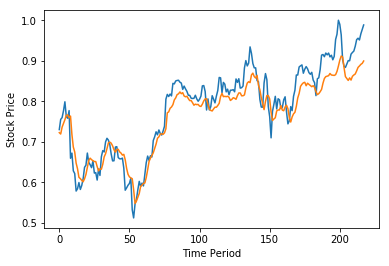

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt

tf.reset_default_graph()

def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


# train Parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

# Open, High, Low, Volume, Close
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]  # Close as label

# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])

# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn=None)  # We use the last cell's output

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()